# COURSEWORK SPECIFICATION

## COM1011 - Fundamentals of Machine Learning

**Module Leader:** Chico Camargo

**Academic Year:** 2025/26

**Title:** Coursework 1

**Submission deadline:** 3rd November 2025, 12:00pm(noon).

This assessment contributes **30%** of the total module mark and assesses the following intended learning outcomes:

1. Understanding and identifying the compromises and trade-offs that must be made when using a machine learning approach;
2. Analysing problems from a data-centric point of view, choosing among a range of supervised and unsupervised machine learning techniques and using relevant software libraries to solve them
3. Stating the importance and difficulty of establishing machine learning solutions; 
4. Using elementary python for implementing machine learning algorithms. 
5. Identifying the compromises that must be made when translating theory into practice; 

**This is an individual assessment** and you are reminded of the University's regulations on collaboration and plagiarism. You must avoid plagiarism, collusion, and any academic misconduct behaviours. Further details about academic honesty and plagiarism can be found at https://ele.exeter.ac.uk/course/view.php?id=1957.

__________________________

# What to submit

You are required to submit your assignment **3rd November 2025 at 12:00pm(noon)**.

Please do all your work in this Jupyter notebook. Make a separate cell for every few lines of code, and use separate cells for text, like this one.
Save your file in the format `COM1011_STUDENTNUMBER.ipynb` and zip it.
For example, if your student number is 12345678, save your coursework as `COM1011_12345678.ipynb`.
Once you have done that, zip the file, producing a file called `COM1011_12345678.zip`. This is the file you will have to upload and submit to ELE.

This assignment will also use three additional files, named `AmesHousingSimple.csv`, `mnist_train.csv`, and `mnist_test.csv`. Do not include them in the `COM1011_STUDENTNUMBER.zip` file.

# Answer template

Please use this notebook for your coursework. Feel free to add more cells for your code and answers, but try to stick to this format. This will make it easier to mark everyone's work fairly.

___________________

In [1]:
# Run this cell so we know the versions of all libraries in your computer
!pip list

Package                 Version
----------------------- -----------
asttokens               3.0.0
blinker                 1.9.0
click                   8.3.0
colorama                0.4.6
comm                    0.2.3
contourpy               1.3.3
cycler                  0.12.1
debugpy                 1.8.17
decorator               5.2.1
executing               2.2.1
Flask                   3.1.2
fonttools               4.60.1
ipykernel               6.30.1
ipython                 9.6.0
ipython_pygments_lexers 1.1.1
itsdangerous            2.2.0
jedi                    0.19.2
Jinja2                  3.1.6
jupyter_client          8.6.3
jupyter_core            5.8.1
kiwisolver              1.4.9
MarkupSafe              3.0.3
matplotlib              3.10.7
matplotlib-inline       0.1.7
nest-asyncio            1.6.0
numpy                   2.3.3
packaging               25.0
pandas                  2.3.3
parso                   0.8.5
pillow                  11.3.0
pip                     25

# Part A - AmesHousing Dataset: Linear Regression Analysis

This part of the assignment is based on the AmesHousing Dataset, which contains information about various features of houses.
It is  real estate dataset from Ames, Iowa (USA) compiled by Dean De Cock for teaching data science. About 2,930 residential property sales with 80–82 features describing each house.
The original Ames dataset has over 80 features (such as lot size, number of rooms, garage details, neighborhood, etc.). To keep things clear and focused, we have reduced it to 7 numeric features + 1 target variable.
Target feature (what we predict): SalePrice (final sale price in USD).



____________________

## 1. Data Preparation (5 points)

1.1. Load the AmesHousingsimple.csv dataset, display the first 5 rows, and report the dataset’s shape and missing value statistics. (1 point)

1.2. Visualize the dataset:  Create scatterplots to explore the relationship between features and the target variable SalePrice. Here we want to plot the scatterplots Gr Liv Area VS SalePrice. (1 points).


-- Q1.1 --
>> First 5 rows of dataset:
-------------------------------------------------------------------------------------------------------
   Lot Area  Overall Qual  Overall Cond  Year Built  Gr Liv Area  Bedroom AbvGr  Garage Cars  SalePrice
0   31770.0           6.0           5.0      1960.0       1656.0            3.0          2.0     215000
1   11622.0           5.0           6.0         NaN        896.0            2.0          1.0     105000
2   14267.0           6.0           NaN      1958.0       1329.0            3.0          1.0     172000
3   11160.0           7.0           5.0      1968.0       2110.0            3.0          2.0     244000
4   13830.0           5.0           5.0      1997.0       1629.0            3.0          2.0     189900

>> This dataset's shape consists of 2930 rows and 8 columns

>> Missing values for each column:
Lot Area         146
Overall Qual     146
Overall Cond     146
Year Built       146
Gr Liv Area      146
Bedroom AbvGr    146
Garage Car

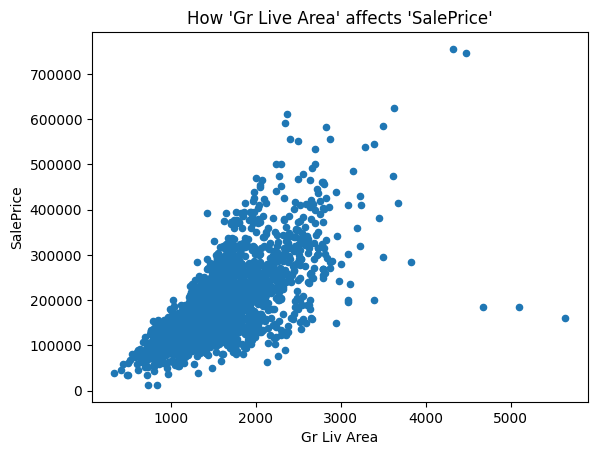

In [60]:
# Answers here
# Import statements
import pandas as pd
import matplotlib.pyplot as plt

###########
## Q 1.1 ##
###########
print("-- Q1.1 --")

# Load the csv file into a Pandas DataFrame
df = pd.read_csv("AmesHousingSimple.csv")

# Display the first 5 rows of the dataset
# Also: df.loc[[0,1,2,3,4]]
print(">> First 5 rows of dataset:\n-------------------------------------------------------------------------------------------------------")
print(df.head().to_string())

# Display the dataset's shape
print(f"\n>> This dataset\'s shape consists of {df.shape[0]} rows and {df.shape[1]} columns")

# Display how many missing values there are in each column
print(f"\n>> Missing values for each column:\n{df.isnull().sum()}")

# Display how many missing values there are in the dataset in total
print(f"\n>> There are {df.isnull().sum().sum()} missing values in the dataset in total\n\n")




###########
## Q 1.2 ##
###########
# Question implied that it only required one scatter plot
print("-- Q1.2 --")

# Plot a scatter graph of 'Gr Live Area' on the x-axis and 'SalePrice' on the y-axis
df.plot(kind="scatter", x="Gr Liv Area", y="SalePrice", title="How \'Gr Live Area\' affects \'SalePrice\'")

# Use matplotlib.pyplot to display this graph
plt.show()


1.3. For each column, report how many values are missing. Which feature has the most missing values? （1 point）

In [49]:
# Answers here
# Display the number of missing values for each column
print(f"Number of missing values for each column:\n{df.isnull().sum()}\n")

# Report which column has the most missing values
# "df.isnull().sum()" is a Pandas Series, i.e. a list with custom index labels
largestColumnValue = 0    # Number of missing values in the largest column
listOfNullValues = df.isnull().sum()

# Loop through each column and the number of missing values it has
for i in range(len(listOfNullValues)):
    # Check if the current number of null values is greater than the largest found so far
    if listOfNullValues.iloc[i] > largestColumnValue:
        # Store the new largest number of null values found
        largestColumnValue = listOfNullValues.iloc[i]
        # Store which coloumn has the current largest
        largestColumn = listOfNullValues.index[i]

print(f"{largestColumn} is the largest column with {largestColumnValue} missing values")



Number of missing values for each column:
Lot Area         146
Overall Qual     146
Overall Cond     146
Year Built       146
Gr Liv Area      146
Bedroom AbvGr    146
Garage Cars      147
SalePrice          0
dtype: int64

Garage Cars is the largest column with 147 missing values


1.4. Try one imputation strategies for missing values (1 point)

In [ ]:
# Answers here
# One strategy for dealing with missing values includes removing the record/row entirely
# Removes all rows that contain a missing value, "inplace=True" means change the existing DataFrame
df.dropna(inplace=True)

# Display the new dataset
print(df.to_string())

      Lot Area  Overall Qual  Overall Cond  Year Built  Gr Liv Area  Bedroom AbvGr  Garage Cars  SalePrice
0      31770.0           6.0           5.0      1960.0       1656.0            3.0          2.0     215000
3      11160.0           7.0           5.0      1968.0       2110.0            3.0          2.0     244000
4      13830.0           5.0           5.0      1997.0       1629.0            3.0          2.0     189900
5       9978.0           6.0           6.0      1998.0       1604.0            3.0          2.0     195500
6       4920.0           8.0           5.0      2001.0       1338.0            2.0          2.0     213500
7       5005.0           8.0           5.0      1992.0       1280.0            2.0          2.0     191500
8       5389.0           8.0           5.0      1995.0       1616.0            2.0          2.0     236500
9       7500.0           7.0           5.0      1999.0       1804.0            3.0          2.0     189000
12      8402.0           6.0         

1.5. Calculate the correlation matrix between all numeric features in the dataset and plot the correlation matrix as a heatmap to visualize relationships between features and SalePrice.(1 point)(1 points).

In [ ]:
# Answers here

## 2. Linear Regression (20 points)

Implement a linear regression model using only the 'Overall Qual', 'Year Built' and 'Bedroom AbvGr ' features to predict 'SalePrice'.
2.1 Separate the dataset into features (X) and target (y = SalePrice). Split into training and testing sets (80/20 split). (2 points)

2.2. Fit the model on the training data and make predictions on the test data. (4 points)

2.3. Calculate and print the Mean Squared Error (MSE) and R-squared score for both training and test sets. (3 points)

2.4. Make a scatterplot comparing the actual 'SalePrice' values vs. the predicted 'SalePrice' values. (3 points)

In [ ]:
# Answers here

2.5.  Implement a linear regression model using all features. (3 points).

2.6.  Make a scatterplot comparing the actual 'SalePrice' values vs. the predicted 'SalePrice' values. (2 points).

2.7.  Compare its performance with the simple linear regression model using the metrics discussed so far. Which one does better? Print the result. (3 points)

In [ ]:
# Answers here

_______________

## 3. Comparing Linear Regression with Polynomial Regression (15 points)

3.1. Implement a linear regression model and a polynomial regression model with degree 2 (a quadratic equation) using the 'Gr Liv Area' feature to predict 'SalePrice'. Do a train-test split, and compare how they perform by printing off their R² values and MSE on both the train and test data. (4 points)

3.2.  Create a scatter plot showing the predictions of both linear and polynomial models on the same graph, against the actual data. (3 points)

In [ ]:
# Answers here

3.3. Implement polynomial regression with degrees 1, 2, 3, and 4 using ALL features. First, plot the fitted regression curves for each degree on top of the data. Then, perform cross-validation and plot the mean squared error (MSE) for each degree to compare their performances. (4 points)

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [ ]:
# Answers here

3.4. Discuss the trade-offs between model complexity and performance. Consider concepts such as overfitting, underfitting, and the bias-variance tradeoff. (4 points)

Answers here (double click to edit this cell)

## 4. Feature Selection (10 points)

4.1. Looking at the performance of using selected features and full features in the linear logic regression tasks, which model performs better and why? Compare the Polynomial Regression models trained by only one feature and full features, which model performs better, and what might explain the difference in performance? (5 points)

Answers here (double click to edit this cell)

4.2. Discuss the impact of feature selection on model performance and interpretability. (5 points)


Answers here (double click to edit this cell)

______________

# Part B - Classification

## 5. Data Preparation and Exploration (5 points)

5.1	Load the MNIST dataset (`mnist_train.csv` and `mnist_test.csv`) using the pandas library. (1 point)

5.2	Separate features (X) and labels (y) for both train and test data. (1 point) Note: In this dataset, the first column corresponds to the label (digit 0–9), and the remaining 784 columns are pixel features.

5.3	Normalize values of the features (X) so they are between 0 and 1. (1 point)

5.4 The input variables (X) should be 784-dimensional vectors. These actually represent 28x28 pixel images[1], but with all pixels represented as individual features. With that in mind, take 5 random data points (i.e. 5 random rows of the dataset), reshape them[2] from 784-dimensional vectors into 28x28 matrices, and display them (2 points).

[1] - https://en.wikipedia.org/wiki/MNIST_database

[2] - https://numpy.org/doc/2.0/reference/generated/numpy.reshape.html

In [ ]:
# Answers here

## 6. Classification using a Perceptron (15 points)

We will use the Perceptron classifier to distinguish between digit '0' and digit '1'. Use only the subset of the data corresponding to these two digits. 

6.1. 	Train the Perceptron on the training data for this binary classification task. (3 points)

6.2. 	Evaluate the Perceptron on the test set. Print out the test accuracy. (3 points)

6.3. 	Plot the confusion matrix showing how well the classifier performs on the test set for this binary task. (3 points)

6.4. Calculate and print the precision, recall, and F1 score for the Perceptron classifier. (3 points)

In [ ]:
# Answers here

 6.5 Implement a multi-class Perceptron classifier for all 10 digits. Train and evaluate it on the full dataset. Print the overall accuracy. (2 points)

In [1]:
# Answers here

 6.6 Plot a confusion matrix for your multi-class classifier. (1 point)

In [ ]:
# Answers here

## 7. Classification with Logistic Regression (15 points)

Now we will implement a Logistic Regression classifier for the same binary classification task as with the perceptron.

7.1. 	Train the Logistic Regression model on the training data for this binary classification task. (3 points)

7.2. 	Evaluate the Logistic Regression model on the test set. Print out the test accuracy. (3 points)

7.3. 	Plot the confusion matrix for the Logistic Regression model on this binary task. (3 points)

7.4. 	Calculate and print the precision, recall, and F1 score for the Logistic Regression classifier (3 points)


In [ ]:
# Answers here

7.5 Implement a multi-class Logistic Regression classifier for all 10 digits. Train and evaluate it on the full dataset. Print the overall accuracy. (2 points)

In [ ]:
# Answers here

 7.6 Plot the confusion matrix for the multi-class Logistic Regression classifier. (1 point)

In [ ]:
# Answers here

## 8. Model Comparison and Analysis (7 points)

8.1. For the multi-class Logistic Regression model, identify the three digits that are most frequently misclassified (i.e. classified wrong). Using the same `numpy.reshape` code as in question 5.4, display example images of these misclassified data points (4 points)

In [ ]:
# Answers here

8.2. Compare the performance of the Perceptron and Logistic Regression models on the binary classification and multi-class tasks. Which performed better? Explain why you think this is the case (3 points)

Answers here (double click to edit this cell)

## 9. Understanding Machine Learning (8 points)

9.1. How might you modify the input data or feature representation to potentially improve the performance of these models on the MNIST dataset? Suggest at least two specific techniques (4 points).

Answers here (double click to edit this cell)

9.2. Explain the importance of the train-test split in this context. What might happen if you trained and evaluated the models on the entire dataset without splitting?  (4 points)

Answers here (double click to edit this cell)